In [ ]:
pip install lazypredict

     |████████████████████████████████| 248 kB 14.4 MB/s 
     |████████████████████████████████| 6.8 MB 32.8 MB/s 
     |████████████████████████████████| 25.9 MB 2.6 MB/s 
     |████████████████████████████████| 14.5 MB 57.3 MB/s 
     |████████████████████████████████| 302 kB 66.4 MB/s 
     |████████████████████████████████| 1.2 MB 57.1 MB/s 
     |████████████████████████████████| 10.1 MB 40.6 MB/s 
     |████████████████████████████████| 269 kB 41.9 MB/s 
     |████████████████████████████████| 72 kB 891 kB/s 
     |████████████████████████████████| 127.6 MB 21 kB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=dca25139dda537469167eddadea97abcc31b06a71953bbe5bce1531b85e22a37
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully 

Importing libraries

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
import statistics
from sklearn import model_selection
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split 
from termcolor import colored as cl
from sklearn.linear_model import LinearRegression     # OLS algorithm
from sklearn.linear_model import Ridge                # Ridge algorithm
from sklearn.linear_model import Lasso                # Lasso algorithm
from sklearn.linear_model import BayesianRidge        # Bayesian algorithm
from sklearn.linear_model import ElasticNet           # ElasticNet algorithm

from sklearn import ensemble
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor      #ExtraTrees Algorithm
from sklearn.ensemble import RandomForestRegressor    #RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor        #AdaBoostRegressor
from sklearn.neural_network import MLPRegressor       #MLP Regressor
import xgboost as xg                                  #XGBoost Regressor
from sklearn.model_selection import GridSearchCV      #GridSearch for feature selection
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score                        # evaluation metric
from sklearn.preprocessing import MinMaxScaler
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
from scipy import stats as st


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading .xlxs file from gdrive

In [ ]:
path = "/content/drive/MyDrive/Batsman_main.xlsx"
data = pd.read_excel(path)
data.head()

,Player Name,Country,Mat,Inns,Not Outs,Runs,HS,Ave,Balls Faced,SR,100,50,0,4s,6s
0,MJ Guptill,NZ,112,108.00,7.00,3299.00,105.00,32.66,2413.00,136.71,2.00,20.00,3.00,287.00,165.00
1,V Kohli,INDIA,97,89.00,25.00,3296.00,94.00,51.50,2394.00,137.67,0.00,30.00,3.00,298.00,92.00
2,RG Sharma,INDIA,125,117.00,15.00,3313.00,118.00,32.48,2374.00,139.55,4.00,26.00,7.00,293.00,155.00
3,PR Stirling,IRE,102,101.00,8.00,2776.00,115.00,29.84,2061.00,134.69,1.00,20.00,9.00,319.00,96.00
4,Mohammad Hafeez,PAK,119,108.00,13.00,2514.00,99.00,26.46,2060.00,122.03,0.00,14.00,7.00,251.00,76.00


In [ ]:
data.isnull().sum()

Player Name      0
Country         26
Mat              0
Inns           205
Not Outs       205
Runs           205
HS             205
Ave            424
Balls Faced    205
SR             237
100            205
50             205
0              205
4s             205
6s             205
dtype: int64

In [ ]:
data = data.dropna()
data.tail()

,Player Name,Country,Mat,Inns,Not Outs,Runs,HS,Ave,Balls Faced,SR,100,50,0,4s,6s
2430,B Shikongo,NAM,16,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
2433,GO Sopinho,MOZ,1,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
2434,L Sreekumar,UAE,1,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
2439,Vraj Patel,KENYA,8,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
2443,M Zondeki,SA,1,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00


In [ ]:
data = data[data['Country']!='PAK']
data.reset_index(inplace=True)

data

,index,Player Name,Country,Mat,Inns,Not Outs,Runs,HS,Ave,Balls Faced,SR,100,50,0,4s,6s
0,0,MJ Guptill,NZ,112,108.00,7.00,3299.00,105.00,32.66,2413.00,136.71,2.00,20.00,3.00,287.00,165.00
1,1,V Kohli,INDIA,97,89.00,25.00,3296.00,94.00,51.50,2394.00,137.67,0.00,30.00,3.00,298.00,92.00
2,2,RG Sharma,INDIA,125,117.00,15.00,3313.00,118.00,32.48,2374.00,139.55,4.00,26.00,7.00,293.00,155.00
3,3,PR Stirling,IRE,102,101.00,8.00,2776.00,115.00,29.84,2061.00,134.69,1.00,20.00,9.00,319.00,96.00
4,7,AJ Finch,AUS,88,88.00,10.00,2686.00,172.00,34.43,1847.00,145.42,2.00,15.00,7.00,267.00,113.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,2430,B Shikongo,NAM,16,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
2151,2433,GO Sopinho,MOZ,1,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
2152,2434,L Sreekumar,UAE,1,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
2153,2439,Vraj Patel,KENYA,8,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00


Reading dataset of auction price

In [ ]:
pathauc = "/content/drive/MyDrive/ipl_2022_dataset.csv"
auc = pd.read_csv(pathauc)
auc = auc.dropna()
auc.tail()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
228,228,Glenn Phillips,1.5 Cr,WICKETKEEPER,1.50,195.00,RR,Sunrisers Hyderabad
229,229,Shreyas Gopal,20 Lakh,BOWLER,0.75,97.50,RR,Sunrisers Hyderabad
230,230,Vishnu Vinod,20 Lakh,WICKETKEEPER,0.50,65.00,DC,Sunrisers Hyderabad
232,232,Priyam Garg,20 Lakh,BATTER,0.20,26.00,SRH,Sunrisers Hyderabad
234,234,Jagadeesha Suchith,20 Lakh,BOWLER,0.20,26.00,SRH,Sunrisers Hyderabad


In [ ]:
res = pd.concat([data, auc], axis=1, join='inner')
res = res.drop("Unnamed: 0",axis =1)
res = res.drop({'Player','Cost IN $ (000)','2021 Squad','Team','Base Price'},axis = 1)
res.head()

,index,Player Name,Country,Mat,Inns,Not Outs,Runs,HS,Ave,Balls Faced,SR,100,50,0,4s,6s,TYPE,COST IN ₹ (CR.)
0,0,MJ Guptill,NZ,112,108.00,7.00,3299.00,105.00,32.66,2413.00,136.71,2.00,20.00,3.00,287.00,165.00,BOWLER,15.00
1,1,V Kohli,INDIA,97,89.00,25.00,3296.00,94.00,51.50,2394.00,137.67,0.00,30.00,3.00,298.00,92.00,ALL-ROUNDER,15.00
2,2,RG Sharma,INDIA,125,117.00,15.00,3313.00,118.00,32.48,2374.00,139.55,4.00,26.00,7.00,293.00,155.00,BOWLER,10.00
3,3,PR Stirling,IRE,102,101.00,8.00,2776.00,115.00,29.84,2061.00,134.69,1.00,20.00,9.00,319.00,96.00,ALL-ROUNDER,9.00
4,7,AJ Finch,AUS,88,88.00,10.00,2686.00,172.00,34.43,1847.00,145.42,2.00,15.00,7.00,267.00,113.00,BATTER,8.00


In [ ]:
res['TYPE'].value_counts() 

ALL-ROUNDER     54
BOWLER          54
BATTER          30
WICKETKEEPER    21
Name: TYPE, dtype: int64

In [ ]:
res = res[res['TYPE'] != 'BOWLER']
res.tail()

,index,Player Name,Country,Mat,Inns,Not Outs,Runs,HS,Ave,Balls Faced,SR,100,50,0,4s,6s,TYPE,COST IN ₹ (CR.)
223,239,Waqas Barkat,HKG,30,25.00,3.00,307.00,37.00,13.95,333.00,92.19,0.00,0.00,3.00,25.00,0.00,ALL-ROUNDER,4.00
226,242,MA Leask,SCOT,43,33.00,4.00,428.00,58.00,14.75,330.00,129.69,0.00,1.00,4.00,29.00,22.00,BATTER,2.60
228,244,WU Tharanga,SL,26,26.00,1.00,407.00,47.00,16.28,330.00,123.33,0.00,0.00,3.00,42.00,12.00,WICKETKEEPER,1.50
230,246,S Vesawkar,NEPAL,20,19.00,5.00,325.00,40.00,23.21,328.00,99.08,0.00,0.00,0.00,26.00,7.00,WICKETKEEPER,0.50
232,248,Yasir Ali,ESP,14,14.00,4.00,348.00,80.00,34.80,326.00,106.74,0.00,2.00,2.00,23.00,16.00,BATTER,0.20


In [ ]:
res = res.drop('TYPE', axis=1)
res.reset_index(inplace=True)
res.tail()

,level_0,index,Player Name,Country,Mat,Inns,Not Outs,Runs,HS,Ave,Balls Faced,SR,100,50,0,4s,6s,COST IN ₹ (CR.)
100,223,239,Waqas Barkat,HKG,30,25.00,3.00,307.00,37.00,13.95,333.00,92.19,0.00,0.00,3.00,25.00,0.00,4.00
101,226,242,MA Leask,SCOT,43,33.00,4.00,428.00,58.00,14.75,330.00,129.69,0.00,1.00,4.00,29.00,22.00,2.60
102,228,244,WU Tharanga,SL,26,26.00,1.00,407.00,47.00,16.28,330.00,123.33,0.00,0.00,3.00,42.00,12.00,1.50
103,230,246,S Vesawkar,NEPAL,20,19.00,5.00,325.00,40.00,23.21,328.00,99.08,0.00,0.00,0.00,26.00,7.00,0.50
104,232,248,Yasir Ali,ESP,14,14.00,4.00,348.00,80.00,34.80,326.00,106.74,0.00,2.00,2.00,23.00,16.00,0.20


In [ ]:
# res['Hard Hitting']= ((4*res['4s'])+(6*res['6s']))/res['Balls Faced']
# res['Fast Scorer']= (res['SR'])/100
# res['Consistency'] = (res['Ave'] + (100*res['100'] + 50*res['50'])/res['Inns'] )/100
# res['Running Between Wickets'] = (res['Runs'] - (4*res['4s']+6*res['6s']))/(res['Balls Faced']-(res['4s']+res['6s']))
# res['Finisher'] = (res['Not Outs']/res['Inns'])
# res['Chase Master'] = (res['HS']-res['0'])/100
# res = res.drop({'index', 'Player Name', 'Mat', 'Inns', 'Not Outs', 'Runs', 'HS', 'Ave',
#        'Balls Faced', 'SR', '100', '50', '0', '4s', '6s','level_0','Country'},axis=1)
# res.head(5)

,COST IN ₹ (CR.),Hard Hitting,Fast Scorer,Consistency,Running Between Wickets,Finisher,Chase Master
0,15.00,0.73,1.38,0.68,0.77,0.28,0.91
1,9.00,0.90,1.35,0.41,0.56,0.08,1.06
2,8.00,0.95,1.45,0.45,0.64,0.11,1.65
3,3.00,0.58,1.18,0.27,0.69,0.21,0.60
4,2.00,0.58,1.22,0.30,0.73,0.22,0.57


In [ ]:
# res['Batsman Quality Index'] = (res['Chase Master'] + 2*res['Fast Scorer'] + res['Finisher'] + 2*res['Hard Hitting'] + 2*res['Running Between Wickets'] + res['Consistency'])/9
# res.head(5)

,COST IN ₹ (CR.),Hard Hitting,Fast Scorer,Consistency,Running Between Wickets,Finisher,Chase Master,Batsman Quality Index
0,15.00,0.73,1.38,0.68,0.77,0.28,0.91,0.85
1,9.00,0.90,1.35,0.41,0.56,0.08,1.06,0.80
2,8.00,0.95,1.45,0.45,0.64,0.11,1.65,0.92
3,3.00,0.58,1.18,0.27,0.69,0.21,0.60,0.67
4,2.00,0.58,1.22,0.30,0.73,0.22,0.57,0.69


Data Cleaning completed

Data Visualization

In [ ]:
# res.head(10)

,COST IN ₹ (CR.),Hard Hitting,Fast Scorer,Consistency,Running Between Wickets,Finisher,Chase Master,Batsman Quality Index
0,15.00,0.73,1.38,0.68,0.77,0.28,0.91,0.85
1,9.00,0.90,1.35,0.41,0.56,0.08,1.06,0.80
2,8.00,0.95,1.45,0.45,0.64,0.11,1.65,0.92
3,3.00,0.58,1.18,0.27,0.69,0.21,0.60,0.67
4,2.00,0.58,1.22,0.30,0.73,0.22,0.57,0.69
5,1.90,0.64,1.26,0.46,0.72,0.33,0.90,0.77
6,1.70,0.84,1.41,0.45,0.70,0.23,0.97,0.84
7,1.40,0.90,1.34,0.40,0.55,0.04,1.14,0.79
8,1.10,0.76,1.31,0.25,0.65,0.10,1.12,0.77
9,0.50,0.70,1.17,0.34,0.56,0.03,0.92,0.68


In [ ]:
# res.columns

Index(['COST IN ₹ (CR.)', 'Hard Hitting', 'Fast Scorer', 'Consistency',
       'Running Between Wickets', 'Finisher', 'Chase Master',
       'Batsman Quality Index'],
      dtype='object')

In [ ]:
# res.dtypes

COST IN ₹ (CR.)            float64
Hard Hitting               float64
Fast Scorer                float64
Consistency                float64
Running Between Wickets    float64
Finisher                   float64
Chase Master               float64
Batsman Quality Index      float64
dtype: object

In [ ]:
# res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   COST IN ₹ (CR.)          105 non-null    float64
 1   Hard Hitting             105 non-null    float64
 2   Fast Scorer              105 non-null    float64
 3   Consistency              105 non-null    float64
 4   Running Between Wickets  105 non-null    float64
 5   Finisher                 105 non-null    float64
 6   Chase Master             105 non-null    float64
 7   Batsman Quality Index    105 non-null    float64
dtypes: float64(8)
memory usage: 6.7 KB


In [ ]:
# res.describe()

,COST IN ₹ (CR.),Hard Hitting,Fast Scorer,Consistency,Running Between Wickets,Finisher,Chase Master,Batsman Quality Index
count,105.00,105.00,105.00,105.00,105.00,105.00,105.00,105.00
mean,5.57,0.73,1.26,0.34,0.63,0.15,0.77,0.72
std,4.69,0.17,0.14,0.10,0.09,0.11,0.23,0.09
min,0.20,0.30,0.92,0.14,0.39,0.00,0.34,0.49
25%,1.10,0.63,1.18,0.26,0.57,0.07,0.61,0.66
50%,4.60,0.70,1.25,0.33,0.64,0.13,0.72,0.70
75%,8.50,0.80,1.35,0.41,0.68,0.20,0.87,0.78
max,17.00,1.34,1.68,0.68,0.88,0.49,1.65,0.94


KeyboardInterrupt: ignored

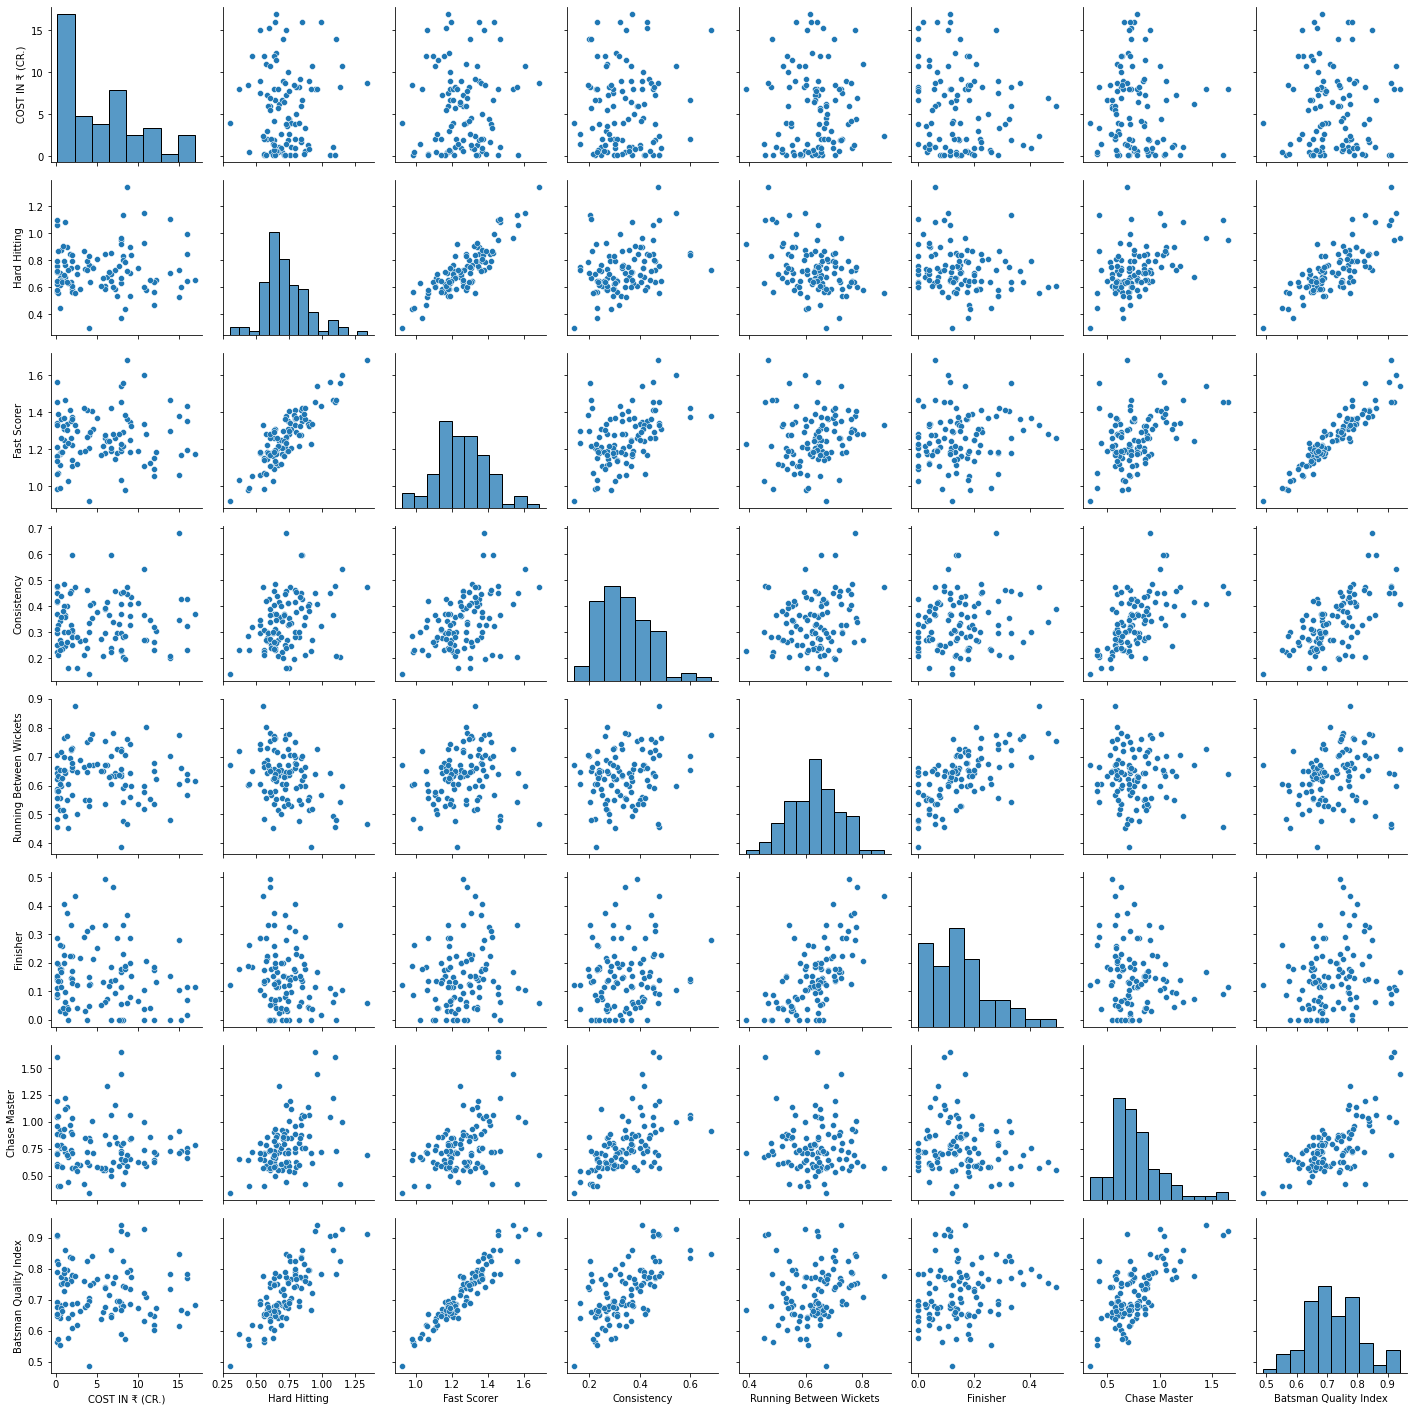

In [ ]:
sb.pairplot(res)

In [ ]:
plt.bar(res['Batsman Quality Index'], res['COST IN ₹ (CR.)'])
  
plt.title('Bar Chart')
  
plt.xlabel('BQI')
plt.ylabel('COST IN ₹ (CR.)')
  
plt.show()

In [ ]:
# 1. Heatmap

# sb.heatmap(df.corr(), annot = True, cmap = 'magma')
sb.heatmap(res.corr(), linewidths=1, annot = True, cmap = 'YlGnBu', robust=True, fmt=".1f", annot_kws={'size':10}, cbar=True, square=True)

# plt.savefig('heatmap.png')
plt.show()

In [ ]:
# 3. Distribution plot

sb.distplot(res['Batsman Quality Index'], color = 'blue')
plt.title('Batsman Quality Index', fontsize = 16)
plt.xlabel('Batsman Quality Index', fontsize = 14)
plt.ylabel('COST IN ₹ (CR.)', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

# plt.savefig('distplot.png')
plt.show()

Statistics

Mean

In [ ]:
statistics.mean(res['Batsman Quality Index'])

In [ ]:
statistics.mean(res['COST IN ₹ (CR.)'])

Median

In [ ]:
statistics.median(res['Batsman Quality Index'])

In [ ]:
statistics.median(res['COST IN ₹ (CR.)'])

Standard Deviation

In [ ]:
np.std(res['Batsman Quality Index'])

In [ ]:
np.std(res['COST IN ₹ (CR.)'])

Hypothesis

In [ ]:
tscore, pscore = st.ttest_1samp(res['Batsman Quality Index'], popmean=0.720898) 
pscore
if(pscore<0.05):
    print("null Rejected")
else:
   print("Null Accepted")

In [ ]:
res.head(10)

Normalizing values

In [ ]:
from sklearn import preprocessing
import numpy as np
import pandas as pd

low = preprocessing.normalize([np.array(res['Hard Hitting'])])
res['Hard Hitting'] = pd.Series(low.flatten())

low = preprocessing.normalize([np.array(res['Fast Scorer'])])
res['Fast Scorer'] = pd.Series(low.flatten())

low = preprocessing.normalize([np.array(res['Consistency'])])
res['Consistency'] = pd.Series(low.flatten())

low = preprocessing.normalize([np.array(res['Running Between Wickets'])])
res['Running Between Wickets'] = pd.Series(low.flatten())

low = preprocessing.normalize([np.array(res['Finisher'])])
res['Finisher'] = pd.Series(low.flatten())

low = preprocessing.normalize([np.array(res['Chase Master'])])
res['Chase Master'] = pd.Series(low.flatten())

low = preprocessing.normalize([np.array(res['Batsman Quality Index'])])
res['Batsman Quality Index'] = pd.Series(low.flatten())

res.head()

Normlaization completed

Model Evaluation

In [ ]:
res

In [ ]:
 # Model1 - 'Hard Hitting', 'Fast Scorer', 'Consistency', 'Running Between Wickets', 'Finisher', 'Chase Master'
 

#X = res[['Hard Hitting', 'Fast Scorer','Consistency', 'Running Between Wickets', 'Finisher', 'Chase Master']].values
#y = res['COST IN ₹ (CR.)'].values

X=res.iloc[:,4:].values
y=res.iloc[:,-1:].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(cl('X_train samples :\n', attrs = ['bold']), X_train[0:5])
print(cl('X_test samples :\n', attrs = ['bold']), X_test[0:5])
print(cl('y_train samples :\n', attrs = ['bold']), y_train[0:5])
print(cl('y_test samples :\n', attrs = ['bold']), y_test[0:5])

print(X_train.shape)
print(y_train.shape)


print(X_test.shape)
print(y_test.shape)

scores=[]

X_train samples :
 [[0.53784219 0.06060606 0.88       0.73805166]
 [0.64454277 0.13953488 0.86       0.66908881]
 [0.55574043 0.03030303 0.92       0.6834102 ]
 [0.70096463 0.15151515 0.86       0.73614344]
 [0.61965423 0.1147541  0.76       0.77079331]]
X_test samples :
 [[0.64325069 0.025      0.72       0.6852983 ]
 [0.64114833 0.06896552 0.66       0.65770527]
 [0.45618557 0.09090909 1.6        0.90982407]
 [0.75052854 0.3125     0.72       0.82344663]
 [0.65505804 0.2        0.76       0.72844568]]
y_train samples :
 [[0.73805166]
 [0.66908881]
 [0.6834102 ]
 [0.73614344]
 [0.77079331]]
y_test samples :
 [[0.6852983 ]
 [0.65770527]
 [0.90982407]
 [0.82344663]
 [0.72844568]]
(78, 4)
(78, 1)
(27, 4)
(27, 1)


In [ ]:
# Lazy Regressor

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 42/42 [00:01<00:00, 25.02it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RANSACRegressor                              1.00       1.00  0.00        0.02
HuberRegressor                               1.00       1.00  0.00        0.05
LinearRegression                             1.00       1.00  0.00        0.01
LassoLarsIC                                  1.00       1.00  0.00        0.02
LassoLarsCV                                  1.00       1.00  0.00        0.02
TransformedTargetRegressor                   1.00       1.00  0.00        0.01
OrthogonalMatchingPursuit                    1.00       1.00  0.00        0.02
LarsCV                                       1.00       1.00  0.00        0.02
Lars                                         1.00       1.00  0.00        0.02
OrthogonalMatchingPursuitCV                  1.00       1.00  0.00        0.02
LinearSVR                                    1.00   

In [ ]:
# Regressor 1 - XGB Regressor

xg_model = XGBRegressor(n_estimators=100, seed = 1234)
param_dict = {'max_depth': [1,2,3,4,5,6],
              'min_child_weight': [2,3,4,5],
              'learning_rate': [0.05, 0.1,0.15],
              'gamma': [0.0, 0.1, 0.2]
}

grid_search = GridSearchCV(xg_model, param_dict)
grid_search.fit(X_train, y_train)
display(grid_search.best_params_)

{'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 2}

In [ ]:
xg_model = XGBRegressor(n_estimators = 1000,
                        learning_rate = 0.15,
                        max_depth = 6,
                        min_child_weight = 3,
                        gamma = 0.0)
xg_model.fit(X_train, y_train)
xg_preds = xg_model.predict(X_test)
corrXGB, _ = pearsonr(y_test, xg_preds)
XGB_r2=r2_score(y_test, xg_preds)
XGB_RMSE = sqrt(mean_squared_error(y_test, xg_preds))

print(cl('R-Squared of XGB Regressor model is {}'.format(r2_score(y_test, xg_preds)), attrs = ['bold']))
print(cl('RMSE of XGB Regressor model is {}'.format(sqrt(mean_squared_error(y_test, xg_preds))), attrs = ['bold']))
print(cl('PCC of XGB Regressor model is {}'.format(corrXGB), attrs = ['bold']))

ValueError: ignored

In [ ]:
print(X_train.shape)

In [ ]:
importances = xg_model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))


In [ ]:
# Regressor 2 - Extra Trees Regressor

param_grid = [
{'n_estimators': [10, 25, 400], 'max_features': [1, 2], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_e_regr = GridSearchCV(ensemble.ExtraTreesRegressor(), param_grid, cv=10)
grid_search_e_regr.fit(X_train, y_train)

#find the best model of grid search
e_regr_best=grid_search_e_regr.best_estimator_

e_regr=e_regr_best.fit(X_train, y_train)
extratrees_preds = e_regr.predict(X_test)
corrExtraTrees, _ = pearsonr(y_test, extratrees_preds)
ExtraTrees_r2=r2_score(y_test, extratrees_preds)
ExtraTrees_RMSE = sqrt(mean_squared_error(y_test, extratrees_preds))

print(cl('R-Squared of ExtraTrees Regressor model is {}'.format(r2_score(y_test, extratrees_preds)), attrs = ['bold']))
print(cl('RMSE of ExtraTrees Regressor model is {}'.format(sqrt(mean_squared_error(y_test, extratrees_preds))), attrs = ['bold']))
print(cl('PCC of ExtraTrees Regressor model is {}'.format(corrExtraTrees), attrs = ['bold']))

In [ ]:
# Regressor 3 - Random Forest Regressor

param_grid = [
{'n_estimators': [10, 25, 400], 'max_features': [1, 2], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(RandomForestRegressor(), param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)


#find the best model of grid search
rand_best=grid_search_forest.best_estimator_

rand_regr=rand_best.fit(X_train, y_train)
randomForest_preds = rand_regr.predict(X_test)
corrRandomForest, _ = pearsonr(y_test, randomForest_preds)
RandomForest_r2=r2_score(y_test, randomForest_preds)
RandomForest_RMSE = sqrt(mean_squared_error(y_test, randomForest_preds))

print(cl('R-Squared of Random Forest Regressor model is {}'.format(r2_score(y_test, randomForest_preds)), attrs = ['bold']))
print(cl('RMSE of Random Forest Regressor model is {}'.format(sqrt(mean_squared_error(y_test, randomForest_preds))), attrs = ['bold']))
print(cl('PCC of Random Forest Regressor model is {}'.format(corrRandomForest), attrs = ['bold']))

In [ ]:
# Regressor 4 - Ada Boost Regressor
param_grid = [
{'base_estimator': [2,None],
 'learning_rate': [0.8,0.2],
 'loss': ['exponential'],
 'n_estimators': [10,50],
 'random_state':[1, None]}
]

ada_search = GridSearchCV(AdaBoostRegressor(), param_grid, n_jobs=-1)
ada_search.fit(X_train, y_train)

#find the best model of grid search
ada_best=ada_search.best_estimator_

ada=ada_best.fit(X_train, y_train)
ada_preds=ada.predict(X_test)
corrAdaBoost, _ = pearsonr(y_test, ada_preds)
AdaBoost_r2=r2_score(y_test, ada_preds)
AdaBoost_RMSE = sqrt(mean_squared_error(y_test, ada_preds))

print(cl('R-Squared of Ada Boost Regressor model is {}'.format(r2_score(y_test, ada_preds)), attrs = ['bold']))
print(cl('RMSE of Ada Boost Regressor model is {}'.format(sqrt(mean_squared_error(y_test, ada_preds))), attrs = ['bold']))
print(cl('PCC of Ada Boost Regressor model is {}'.format(corrAdaBoost), attrs = ['bold']))

In [ ]:
# Regressor 5 - MLP Regressor

param_grid = [
{'max_iter':[1000,500,10],
 'random_state':[1,0],    
 'alpha':[0.1,0.001,0,0.5,0.05,0.15,0.2]
}
]

clf = GridSearchCV(MLPRegressor(), param_grid, n_jobs=-1)
clf.fit(X_train, y_train)

#find the best model of grid search
regr_best=clf.best_estimator_

regr=regr_best.fit(X_train, y_train)
mlp_preds = regr.predict(X_test)
corrMLP, _ = pearsonr(y_test, mlp_preds)
MLP_r2=r2_score(y_test, mlp_preds)
MLP_RMSE = sqrt(mean_squared_error(y_test, mlp_preds))

print(cl('R-Squared of MLP Regressor model is {}'.format(r2_score(y_test, mlp_preds)), attrs = ['bold']))
print(cl('RMSE of MLP Regressor model is {}'.format(sqrt(mean_squared_error(y_test, mlp_preds))), attrs = ['bold']))
print(cl('PCC of MLP Regressor model is {}'.format(corrMLP), attrs = ['bold']))

In [ ]:
# Regressor 6 - Lasso Regressor

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_preds = lasso.predict(X_test)
corrLasso, _ = pearsonr(y_test, lasso_preds)
Lasso_r2=r2_score(y_test, lasso_preds)
Lasso_RMSE = sqrt(mean_squared_error(y_test, lasso_preds))

print(cl('R-Squared of Lasso Regressor model is {}'.format(r2_score(y_test, lasso_preds)), attrs = ['bold']))
print(cl('RMSE of Lasso Regressor model is {}'.format(sqrt(mean_squared_error(y_test, lasso_preds))), attrs = ['bold']))
print(cl('PCC of Lasso Regressor model is {}'.format(corrLasso), attrs = ['bold']))

In [ ]:
# Regressor 7 - Bayesian Regressor

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_preds = bayesian.predict(X_test)
corrBayesian, _ = pearsonr(y_test, bayesian_preds)
Bayesian_r2=r2_score(y_test, bayesian_preds)
Bayesian_RMSE = sqrt(mean_squared_error(y_test, bayesian_preds))

print(cl('R-Squared of Bayesian Regressor model is {}'.format(r2_score(y_test, bayesian_preds)), attrs = ['bold']))
print(cl('RMSE of Bayesian Regressor model is {}'.format(sqrt(mean_squared_error(y_test, bayesian_preds))), attrs = ['bold']))
print(cl('PCC of Bayesian Regressor model is {}'.format(corrBayesian), attrs = ['bold']))

In [ ]:
# Regressor 8 - Ridge Regressor

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_preds = ridge.predict(X_test)
corrRidge, _ = pearsonr(y_test, ridge_preds)
Ridge_r2=r2_score(y_test, ridge_preds)
Ridge_RMSE = sqrt(mean_squared_error(y_test, ridge_preds))

print(cl('R-Squared of Ridge Regressor model is {}'.format(r2_score(y_test, ridge_preds)), attrs = ['bold']))
print(cl('RMSE of Ridge Regressor model is {}'.format(sqrt(mean_squared_error(y_test, ridge_preds))), attrs = ['bold']))
print(cl('PCC of Ridge Regressor model is {}'.format(corrRidge), attrs = ['bold']))

In [ ]:
# Regressor 9 - Elastic Net Regressor

en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_preds = en.predict(X_test)
corrElasticNet, _ = pearsonr(y_test, en_preds)
ElasticNet_r2=r2_score(y_test, en_preds)
ElasticNet_RMSE = sqrt(mean_squared_error(y_test, en_preds))

print(cl('R-Squared of Elastic Net Regressor model is {}'.format(r2_score(y_test, en_preds)), attrs = ['bold']))
print(cl('RMSE of Elastic Net Regressor model is {}'.format(sqrt(mean_squared_error(y_test, en_preds))), attrs = ['bold']))
print(cl('PCC of Elastic Net Regressor model is {}'.format(corrElasticNet), attrs = ['bold']))

In [ ]:
# Regressor 10 - Linear Regressor

from sklearn.linear_model import LinearRegression
from sklearn import metrics

en = LinearRegression()
en.fit(X_train, y_train)
en_preds = en.predict(X_test)
corrLinearRegression, _ = pearsonr(y_test, en_preds)
LinearRegression_r2=r2_score(y_test, en_preds)
LinearRegression_RMSE = sqrt(mean_squared_error(y_test, en_preds))

print(cl('R-Squared of Linear Regressor model is {}'.format(r2_score(y_test, en_preds)), attrs = ['bold']))
print(cl('RMSE of Linear Regressor model is {}'.format(sqrt(mean_squared_error(y_test, en_preds))), attrs = ['bold']))
print(cl('PCC of Linear Regressor model is {}'.format(corrLinearRegression), attrs = ['bold']))

In [ ]:
models_cross = pd.DataFrame({
    'Algorithm': ['XGB Regressor', 'Extra Trees Regressor', 'Random Forest', 'Ada Boost', 'MLP', 'Lasso', 'Bayesian', 'Ridge', 'Elastic Net'],
    'R2 Score': [XGB_r2, ExtraTrees_r2, RandomForest_r2, AdaBoost_r2, MLP_r2, Lasso_r2, Bayesian_r2, Ridge_r2, ElasticNet_r2],
    'RMSE': [XGB_RMSE, ExtraTrees_RMSE, RandomForest_RMSE, AdaBoost_RMSE, MLP_RMSE, Lasso_RMSE, Bayesian_RMSE, Ridge_RMSE, ElasticNet_RMSE],
    'PCC': [corrXGB, corrExtraTrees, corrRandomForest, corrAdaBoost, corrMLP, corrLasso, corrBayesian, corrRidge, corrElasticNet]
     })
    
models_cross.sort_values(by='R2 Score', ascending=False)